## Proje Açıklaması: Hisse Senedi Analiz Panosu

Bu proje, bir Tkinter arayüzü üzerinden hisse senedi verilerini analiz etmek için çeşitli grafikler sunan bir uygulama geliştirmektedir. Proje, finansal verileri analiz etmek ve görselleştirmek için Python kütüphanelerini kullanmaktadır. İşte projenin ana bileşenleri ve işlevleri:

### 1. Gerekli Kütüphaneler ve Kurulum

Projenin çalışabilmesi için gerekli olan kütüphaneler yüklenir:
- `yfinance`: Hisse senedi verilerini indirmek için.
- `tkinter`: Grafik kullanıcı arayüzü oluşturmak için.
- `matplotlib`: Grafiklerin çizilmesi için.
- `ta`: Teknik analiz göstergeleri hesaplamak için.

### 2. Veri Çekme

`yfinance` kütüphanesi kullanılarak, kullanıcı tarafından belirtilen hisse senedinin (örneğin, NVIDIA'nın "NVDA") 1 dakikalık aralıklarla günlük verileri çekilir. Bu veriler, kapanış fiyatları, işlem hacmi gibi bilgileri içerir ve ilk 5 satırı ekrana yazdırılır. Verilerde hata oluşursa kullanıcıya bildirilir.

### 3. Tkinter Arayüzü

Arayüz, hisse senedi analizini görselleştirmek için tasarlanmıştır:
- **Giriş Alanı**: Kullanıcıdan hisse senedi kodunu girmesi istenir.
- **Buton**: Kullanıcının veriyi güncellemesi için bir buton bulunur.
- **Grafik Alanı**: Farklı grafikler için birden fazla subplot içeren bir `matplotlib` figürü oluşturulur.

### 4. Veri Güncelleme ve Görselleştirme

- **Veri Güncelleme**: Kullanıcı bir hisse senedi kodu girdiğinde, bu kod kullanılarak `yfinance` aracılığıyla veri çekilir ve analiz yapılır.
- **Grafikler**:
  - **Fiyat ve Zaman**: Hisse senedinin kapanış fiyatları zamanla birlikte çizilir. Ayrıca işlem hacmini gösteren ikinci bir y ekseni eklenir.
  - **Hareketli Ortalama (MA)**: 20 ve 50 günlük hareketli ortalamalar çizilir.
  - **Aylık Ortalama Fiyat**: Her ayın ortalama kapanış fiyatları bir bar grafiği ile gösterilir.
  - **Hacim**: Günlük işlem hacmi bar grafiği ile görselleştirilir.
  - **RSI (Göreceli Güç Endeksi)**: RSI göstergesi çizilir ve aşırı alım/satım seviyeleri işaretlenir.
  - **Bollinger Bantları**: 20 günlük hareketli ortalama ve üst/alt Bollinger bantları gösterilir.
  - **MACD (Hareketli Ortalama Yakınsama Diverjansı)**: MACD ve sinyal çizgileri, ayrıca MACD histogramı görselleştirilir.
  - **OBV (On-Balance Volume)**: Toplam işlem hacmi ve fiyat değişimlerine dayalı olarak hesaplanan OBV çizilir.
  - **Stokastik Osilatör**: %K ve %D çizgileri ile stokastik osilatör grafiği oluşturulur.

### 5. Otomatik Güncellemeler

Arayüzdeki veri, belirli aralıklarla otomatik olarak güncellenir. Bu, hisse senedi verilerinin güncel tutulmasını sağlar ve kullanıcıya en son verileri sunar. Ayrıca, veri çekildiği tarih arayüzde gösterilir.

Bu proje, hisse senedi yatırımcılarına, teknik analiz araçlarını kullanarak piyasa trendlerini izleme ve analiz etme olanağı sunar. Tkinter arayüzü sayesinde kullanıcı dostu bir deneyim sağlar ve matplotlib ile çeşitli görselleştirmeler sunar.

### Gerekli kütüpanelerin yüklenmesi.

In [1]:
!pip install yfinance tkinter matplotlib ta mplfinance

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


### yfinance gelen verilerin kontrol edilmesi.

In [2]:
import yfinance as yf

try:
    stock_data = yf.Ticker("NVDA").history(period="1d", interval="1m")
    print(stock_data.head())
except Exception as e:
    print(f"Hatalı veri gelişi: {e}")

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-07-30 09:30:00-04:00  111.510002  111.654999  110.879997  110.889999   
2024-07-30 09:31:00-04:00  110.900002  111.660004  110.900002  111.489998   
2024-07-30 09:32:00-04:00  111.470001  111.800003  111.260002  111.630096   
2024-07-30 09:33:00-04:00  111.690002  111.739998  111.309998  111.389900   
2024-07-30 09:34:00-04:00  111.345901  111.525002  110.900002  111.369797   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2024-07-30 09:30:00-04:00  7599767        0.0           0.0  
2024-07-30 09:31:00-04:00  1321947        0.0           0.0  
2024-07-30 09:32:00-04:00  1001295        0.0           0.0  
2024-07-30 09:33:00-04:00   902604        0.0           0.0  
2024-07-30 09:34:00-04:00  1201131        0.0           0.0  


### Veri çekip görselleştime işlemi yapan kod.

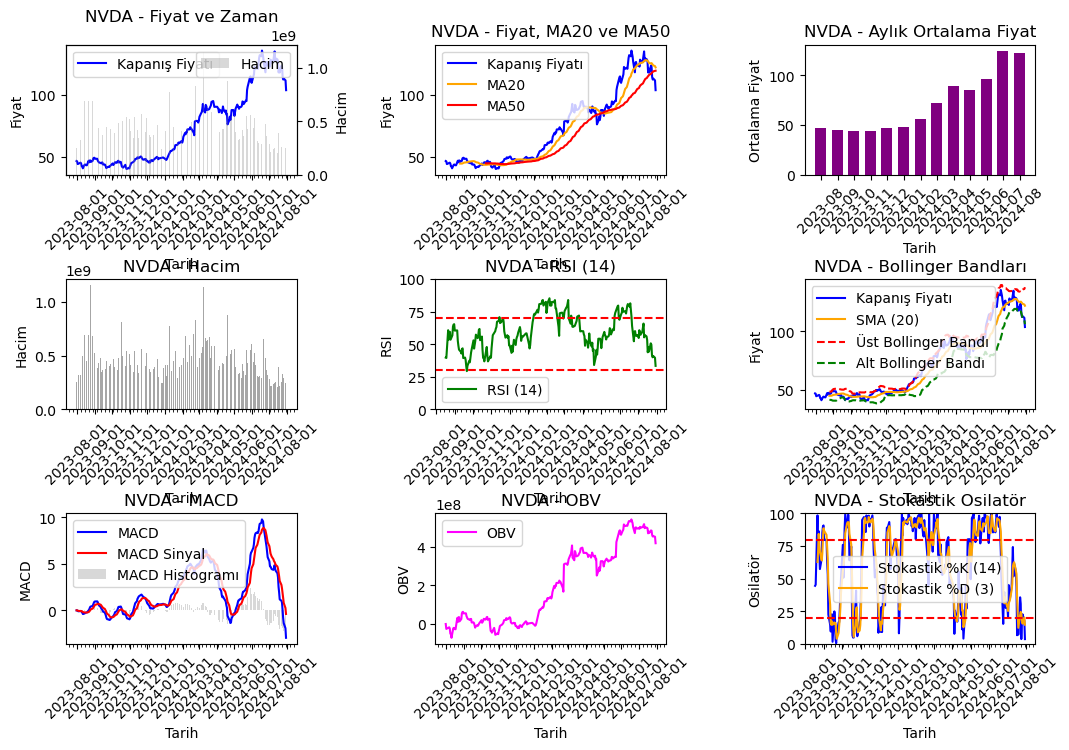

In [4]:
import tkinter as tk
from tkinter import ttk
from tkinter import simpledialog
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.trend import SMAIndicator

class StockApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Hisse Senedi Analiz Panosu")

        self.ticker_entry_frame = tk.Frame(root)
        self.ticker_entry_frame.pack(pady=10)

        self.ticker_label = tk.Label(self.ticker_entry_frame, text="Hisse Senedi Kodu:")
        self.ticker_label.pack(side=tk.LEFT)

        self.ticker_entry = tk.Entry(self.ticker_entry_frame)
        self.ticker_entry.pack(side=tk.LEFT)

        self.submit_button = tk.Button(self.ticker_entry_frame, text="Göster", command=self.update_stock_data)
        self.submit_button.pack(side=tk.LEFT)

        self.fig, self.axes = plt.subplots(3, 3, figsize=(20, 15))
        plt.subplots_adjust(hspace=0.8, wspace=0.6)

        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        self.ticker = None

    def update_stock_data(self):
        self.ticker = self.ticker_entry.get().upper()
        try:
            stock_data = yf.Ticker(self.ticker).history(period="1y", interval="1d")
            if stock_data.empty:
                print(f"No data found for {self.ticker}")
                return

            self.plot_price_vs_time(stock_data)
            self.plot_ma(stock_data)
            self.plot_monthly_avg(stock_data)
            self.plot_volume(stock_data)
            self.plot_rsi(stock_data)
            self.plot_bollinger_bands(stock_data)
            self.plot_macd(stock_data)
            self.plot_obv(stock_data)
            self.plot_stochastic_oscillator(stock_data)  # Yeni grafik
        except Exception as e:
            print(f"Error fetching data for {self.ticker}: {e}")

    def plot_price_vs_time(self, data):
        ax = self.axes[0, 0]
        ax.clear()

        ax.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue')
        ax.set_title(f'{self.ticker} - Fiyat ve Zaman')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Fiyat')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        ax2 = ax.twinx()
        ax2.bar(data.index, data['Volume'], color='gray', alpha=0.3, width=0.5)
        ax2.set_ylabel('Hacim')
        ax2.legend(['Hacim'], loc='upper right')

        self.canvas.draw()

    def plot_ma(self, data):
        ax = self.axes[0, 1]
        ax.clear()

        ax.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue')

        ma20 = data['Close'].rolling(window=20).mean()
        ax.plot(data.index, ma20, label='MA20', color='orange')

        ma50 = data['Close'].rolling(window=50).mean()
        ax.plot(data.index, ma50, label='MA50', color='red')

        ax.set_title(f'{self.ticker} - Fiyat, MA20 ve MA50')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Fiyat')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_monthly_avg(self, data):
        monthly_data = data.resample('M').mean()

        ax = self.axes[0, 2]
        ax.clear()
        ax.bar(monthly_data.index, monthly_data['Close'], color='purple', width=20)
        ax.set_title(f'{self.ticker} - Aylık Ortalama Fiyat')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Ortalama Fiyat')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.tick_params(axis='x', rotation=45)

        self.canvas.draw()

    def plot_volume(self, data):
        ax = self.axes[1, 0]
        ax.clear()

        ax.bar(data.index, data['Volume'], color='gray', alpha=0.7)
        ax.set_title(f'{self.ticker} - Hacim')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Hacim')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)

        self.canvas.draw()

    def plot_rsi(self, data):
        ax = self.axes[1, 1]
        ax.clear()

        rsi = RSIIndicator(data['Close'], window=14).rsi()
        ax.plot(data.index, rsi, label='RSI (14)', color='green')
        ax.axhline(70, color='red', linestyle='--')
        ax.axhline(30, color='red', linestyle='--')
        ax.set_title(f'{self.ticker} - RSI (14)')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('RSI')
        ax.set_ylim(0, 100)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_bollinger_bands(self, data):
        ax = self.axes[1, 2]
        ax.clear()

        sma = SMAIndicator(data['Close'], window=20).sma_indicator()
        rolling_std = data['Close'].rolling(window=20).std()
        upper_band = sma + (rolling_std * 2)
        lower_band = sma - (rolling_std * 2)

        ax.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue')
        ax.plot(data.index, sma, label='SMA (20)', color='orange')
        ax.plot(data.index, upper_band, label='Üst Bollinger Bandı', color='red', linestyle='--')
        ax.plot(data.index, lower_band, label='Alt Bollinger Bandı', color='green', linestyle='--')

        ax.set_title(f'{self.ticker} - Bollinger Bandları')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Fiyat')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_macd(self, data):
        ax = self.axes[2, 0]
        ax.clear()

        macd = data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean()
        signal = macd.ewm(span=9).mean()
        ax.plot(data.index, macd, label='MACD', color='blue')
        ax.plot(data.index, signal, label='MACD Sinyal', color='red')
        ax.bar(data.index, macd - signal, label='MACD Histogramı', color='gray', alpha=0.3)

        ax.set_title(f'{self.ticker} - MACD')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('MACD')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_obv(self, data):
        ax = self.axes[2, 1]
        ax.clear()

        obv = (data['Volume'] * ((data['Close'] - data['Close'].shift(1)) / data['Close'].shift(1))).cumsum()
        ax.plot(data.index, obv, label='OBV', color='magenta')

        ax.set_title(f'{self.ticker} - OBV')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('OBV')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_stochastic_oscillator(self, data):
        ax = self.axes[2, 2]
        ax.clear()

        stoch = StochasticOscillator(data['High'], data['Low'], data['Close'], window=14)
        stoch_k = stoch.stoch()
        stoch_d = stoch.stoch_signal()

        ax.plot(data.index, stoch_k, label='Stokastik %K (14)', color='blue')
        ax.plot(data.index, stoch_d, label='Stokastik %D (3)', color='orange')
        ax.axhline(80, color='red', linestyle='--')
        ax.axhline(20, color='red', linestyle='--')
        ax.set_title(f'{self.ticker} - Stokastik Osilatör')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Osilatör')
        ax.set_ylim(0, 100)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = StockApp(root)
    root.mainloop()

### 10 saniyede bir anlık veri çekme işlemini yapan kod.

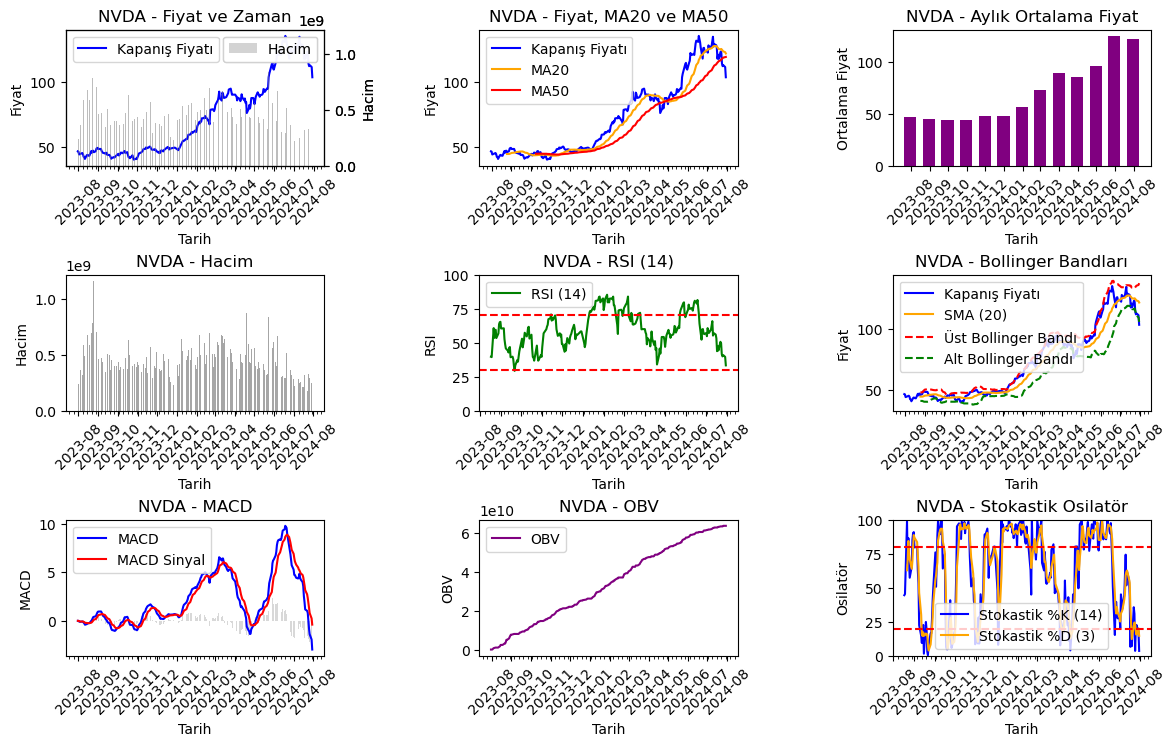

In [15]:
import tkinter as tk
from tkinter import ttk
from tkinter import simpledialog
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.trend import SMAIndicator
from datetime import datetime

class StockApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Hisse Senedi Analiz Panosu")
        self.root.geometry("1400x900")  # Pencere boyutunu ayarla

        self.ticker_entry_frame = tk.Frame(root)
        self.ticker_entry_frame.pack(pady=10)

        self.ticker_label = tk.Label(self.ticker_entry_frame, text="Hisse Senedi Kodu:")
        self.ticker_label.pack(side=tk.LEFT)

        self.ticker_entry = tk.Entry(self.ticker_entry_frame)
        self.ticker_entry.pack(side=tk.LEFT)

        self.submit_button = tk.Button(self.ticker_entry_frame, text="Göster", command=self.start_update)
        self.submit_button.pack(side=tk.LEFT)

        self.date_label = tk.Label(root, text="Veri Çekildiği Tarih: -")
        self.date_label.pack(pady=10)

        self.fig, self.axes = plt.subplots(3, 3, figsize=(20, 15))
        plt.subplots_adjust(hspace=0.8, wspace=0.6)

        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        self.ticker = None
        self.stock_data = None
        self.update_interval = 10000  # 10 saniye
        self.update_task = None

    def start_update(self):
        self.ticker = self.ticker_entry.get().upper()
        self.update_stock_data()
        self.schedule_update()

    def schedule_update(self):
        if self.update_task:
            self.root.after_cancel(self.update_task)
        self.update_task = self.root.after(self.update_interval, self.update_stock_data)

    def update_stock_data(self):
        try:
            if self.ticker:
                self.stock_data = yf.Ticker(self.ticker).history(period="1y", interval="1d")
                if self.stock_data.empty:
                    print(f"No data found for {self.ticker}")
                    return

                self.date_label.config(text=f"Veri Çekildiği Tarih: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
                self.plot_price_vs_time(self.stock_data)
                self.plot_ma(self.stock_data)
                self.plot_monthly_avg(self.stock_data)
                self.plot_volume(self.stock_data)
                self.plot_rsi(self.stock_data)
                self.plot_bollinger_bands(self.stock_data)
                self.plot_macd(self.stock_data)
                self.plot_obv(self.stock_data)
                self.plot_stochastic_oscillator(self.stock_data)
        except Exception as e:
            print(f"Error fetching data for {self.ticker}: {e}")

    def plot_price_vs_time(self, data):
        ax = self.axes[0, 0]
        ax.clear()

        ax.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue')
        ax.set_title(f'{self.ticker} - Fiyat ve Zaman')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Fiyat')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Yıl ve ay formatı
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        ax2 = ax.twinx()
        ax2.bar(data.index, data['Volume'], color='gray', alpha=0.3, width=0.5)
        ax2.set_ylabel('Hacim')
        ax2.legend(['Hacim'], loc='upper right')

        self.canvas.draw()

    def plot_ma(self, data):
        ax = self.axes[0, 1]
        ax.clear()

        ax.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue')

        ma20 = data['Close'].rolling(window=20).mean()
        ax.plot(data.index, ma20, label='MA20', color='orange')

        ma50 = data['Close'].rolling(window=50).mean()
        ax.plot(data.index, ma50, label='MA50', color='red')

        ax.set_title(f'{self.ticker} - Fiyat, MA20 ve MA50')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Fiyat')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Yıl ve ay formatı
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_monthly_avg(self, data):
        monthly_data = data.resample('M').mean()

        ax = self.axes[0, 2]
        ax.clear()
        ax.bar(monthly_data.index, monthly_data['Close'], color='purple', width=20)
        ax.set_title(f'{self.ticker} - Aylık Ortalama Fiyat')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Ortalama Fiyat')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Yıl ve ay formatı
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.tick_params(axis='x', rotation=45)

        self.canvas.draw()

    def plot_volume(self, data):
        ax = self.axes[1, 0]
        ax.clear()

        ax.bar(data.index, data['Volume'], color='gray', alpha=0.7)
        ax.set_title(f'{self.ticker} - Hacim')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Hacim')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Yıl ve ay formatı
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)

        self.canvas.draw()

    def plot_rsi(self, data):
        ax = self.axes[1, 1]
        ax.clear()

        rsi = RSIIndicator(data['Close'], window=14).rsi()
        ax.plot(data.index, rsi, label='RSI (14)', color='green')
        ax.axhline(70, color='red', linestyle='--')
        ax.axhline(30, color='red', linestyle='--')
        ax.set_title(f'{self.ticker} - RSI (14)')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('RSI')
        ax.set_ylim(0, 100)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Yıl ve ay formatı
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_bollinger_bands(self, data):
        ax = self.axes[1, 2]
        ax.clear()

        sma = SMAIndicator(data['Close'], window=20).sma_indicator()
        rolling_std = data['Close'].rolling(window=20).std()
        upper_band = sma + (rolling_std * 2)
        lower_band = sma - (rolling_std * 2)

        ax.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue')
        ax.plot(data.index, sma, label='SMA (20)', color='orange')
        ax.plot(data.index, upper_band, label='Üst Bollinger Bandı', color='red', linestyle='--')
        ax.plot(data.index, lower_band, label='Alt Bollinger Bandı', color='green', linestyle='--')

        ax.set_title(f'{self.ticker} - Bollinger Bandları')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Fiyat')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Yıl ve ay formatı
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_macd(self, data):
        ax = self.axes[2, 0]
        ax.clear()

        macd = data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean()
        signal = macd.ewm(span=9).mean()
        ax.plot(data.index, macd, label='MACD', color='blue')
        ax.plot(data.index, signal, label='MACD Sinyal', color='red')
        ax.bar(data.index, macd - signal, color='gray', alpha=0.3)
        ax.set_title(f'{self.ticker} - MACD')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('MACD')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Yıl ve ay formatı
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_obv(self, data):
        ax = self.axes[2, 1]
        ax.clear()

        obv = (data['Volume'] * (data['Close'].diff() > 0).astype(int)).cumsum()
        ax.plot(data.index, obv, label='OBV', color='purple')
        ax.set_title(f'{self.ticker} - OBV')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('OBV')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Yıl ve ay formatı
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

    def plot_stochastic_oscillator(self, data):
        ax = self.axes[2, 2]
        ax.clear()

        stoch = StochasticOscillator(data['High'], data['Low'], data['Close'], window=14)
        stoch_k = stoch.stoch()
        stoch_d = stoch.stoch_signal()

        ax.plot(data.index, stoch_k, label='Stokastik %K (14)', color='blue')
        ax.plot(data.index, stoch_d, label='Stokastik %D (3)', color='orange')
        ax.axhline(80, color='red', linestyle='--')
        ax.axhline(20, color='red', linestyle='--')
        ax.set_title(f'{self.ticker} - Stokastik Osilatör')
        ax.set_xlabel('Tarih')
        ax.set_ylabel('Osilatör')
        ax.set_ylim(0, 100)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
        ax.tick_params(axis='x', rotation=45)
        ax.legend()

        self.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = StockApp(root)
    root.mainloop()